In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
pef_data = pd.read_csv('personal_economic_freedom.csv')

In [3]:
pef_data.head()

,year,ISO_code,countries,region,pf_score,ef_score
0,2016,ALB,Albania,Eastern Europe,7.596281,7.54
1,2016,DZA,Algeria,Middle East & North Africa,5.281772,4.99
2,2016,AGO,Angola,Sub-Saharan Africa,6.111324,5.17
3,2016,ARG,Argentina,Latin America & the Caribbean,8.099696,4.84
4,2016,ARM,Armenia,Caucasus & Central Asia,6.912804,7.57


In [4]:
pef_data.describe()

,year,pf_score,ef_score
count,1378.000000,1378.000000,1378.000000
mean,2012.111756,7.201278,6.785610
std,2.569130,1.374947,0.883601
min,2008.000000,2.166555,2.880000
25%,2010.000000,6.197388,6.250000
50%,2012.000000,7.189009,6.900000
75%,2014.000000,8.449475,7.410000
max,2016.000000,9.568154,9.190000


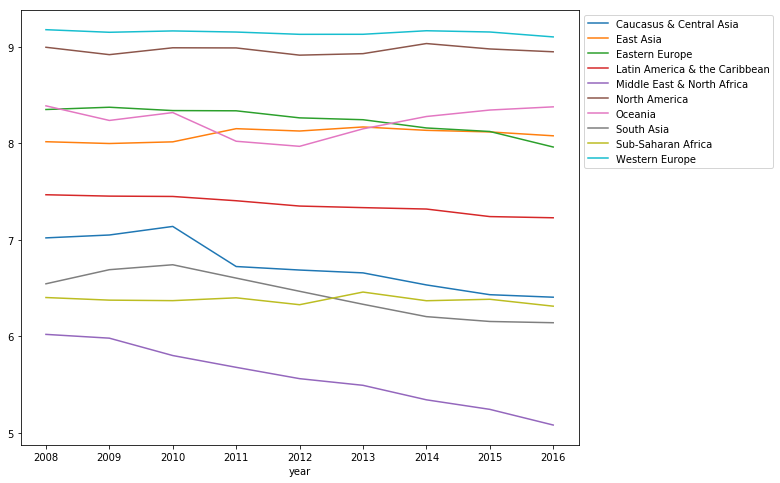

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
for index, group in pef_data.groupby(['region']):
    group_agg = group.groupby(['year']).aggregate(np.mean)
    group_agg.plot(y='pf_score', label=index, ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

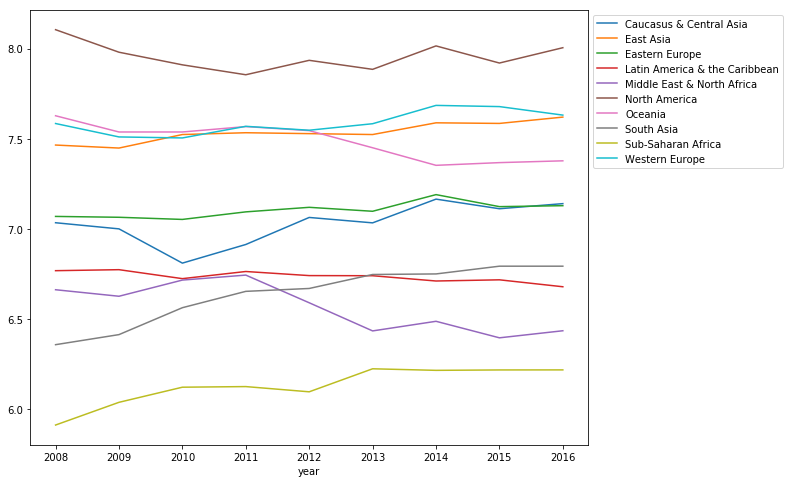

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
for index, group in pef_data.groupby(['region']):
    group_agg = group.groupby(['year']).aggregate(np.mean)
    group_agg.plot(y='ef_score', label=index, ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

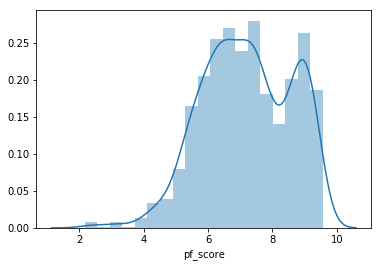

In [7]:
sns.distplot(pef_data['pf_score'])

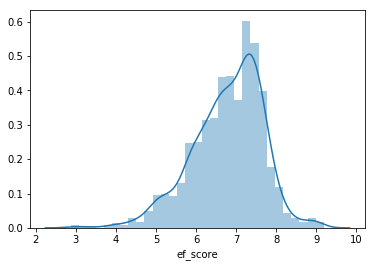

In [8]:
sns.distplot(pef_data['ef_score'])

In [9]:
pef_data_by_region = pef_data.groupby('region').mean()
pef_data_by_region

,year,pf_score,ef_score
region,,,
Caucasus & Central Asia,2012.134615,6.728434,7.030577
East Asia,2012.000000,8.091040,7.535000
Eastern Europe,2012.021053,8.238800,7.104474
Latin America & the Caribbean,2012.030172,7.361093,6.734871
Middle East & North Africa,2012.280000,5.545928,6.557000
North America,2012.000000,8.967163,7.956667
Oceania,2012.000000,8.232802,7.484722
South Asia,2012.294118,6.411671,6.655809
Sub-Saharan Africa,2012.155172,6.378440,6.135259


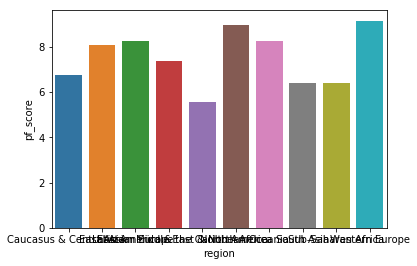

In [10]:
# fig, ax1 = pyplot.subplots(figsize=(10, 10))
# tidy = (
#     first_layer_by_region.set_index('Factor')
#       .stack()  # un-pivots the data 
#       .reset_index()  # moves all data out of the index
#       .rename(columns={'level_1': 'Variable', 0: 'Value'})
# )
sns.barplot(x='region', y='pf_score', data=pef_data_by_region.reset_index())
# seaborn.despine(fig)

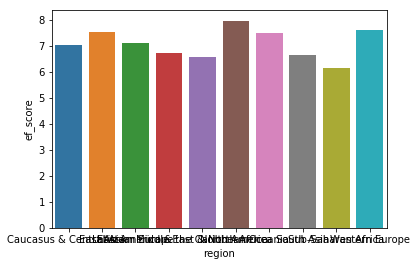

In [11]:
sns.barplot(x='region', y='ef_score', data=pef_data_by_region.reset_index())

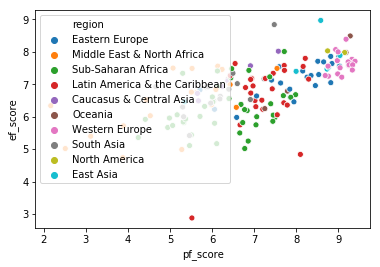

In [12]:
sns.scatterplot(x="pf_score", y="ef_score", hue="region", data=pef_data[pef_data['year']==2016])